In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
sess = tf.Session()

In [6]:
hello = tf.constant("Hello")


In [7]:
sess.run(hello)

b'Hello'

In [8]:
a =tf.constant(20)
b =tf.constant(22)

In [9]:
'a + b = {}'.format(sess.run(a+b))

'a + b = 42'

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [12]:
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000,high=3500,size=num_house)

In [13]:
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000,high=70000,size=num_house)

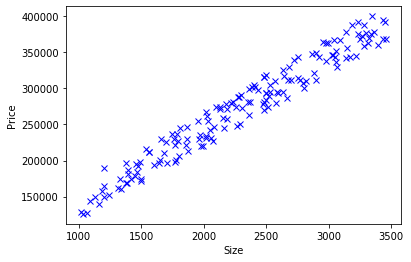

In [14]:
plt.plot(house_size,house_price,'bx')
plt.ylabel('Price')
plt.xlabel('Size')
plt.show()

In [15]:
def normalize(array):
    return (array - array.mean()) / array.std()

In [16]:
num_train_samples = math.floor(num_house * 0.7)

In [17]:
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asarray(house_price[:num_train_samples:])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

In [18]:
test_house_size = np.asarray(house_size[num_train_samples:])
test_house_price = np.asarray(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

Constant , constant value 

Variable , values adjusted in graph

Placeholder , used to pass data into graph

In [19]:
tf_house_size = tf.placeholder("float",name="house_size")
tf_price = tf.placeholder("float",name="price")

In [20]:
tf_size_factor = tf.Variable(np.random.randn(),name='size_factor')
tf_price_offset = tf.Variable(np.random.randn(),name='price_offset')

In [21]:
tf_price_pred = tf.add(tf.multiply(tf_size_factor,tf_house_size),tf_price_offset)

In [22]:
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred - tf_price,2))/(2*num_train_samples)

In [23]:
learning_rate= 0.1

In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

In [25]:
init = tf.global_variables_initializer()

In [26]:
sess.run(init)

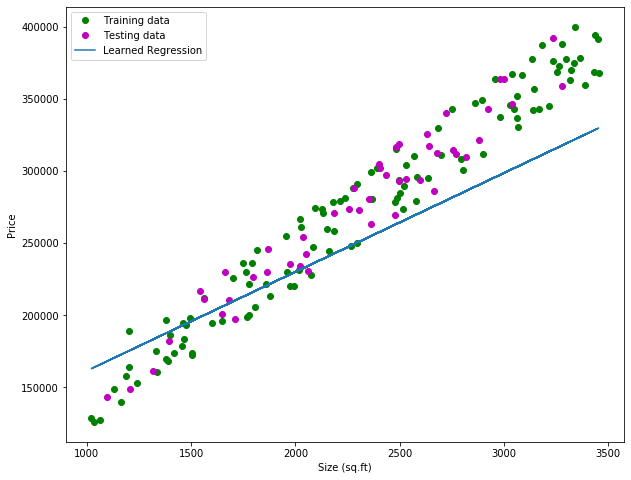

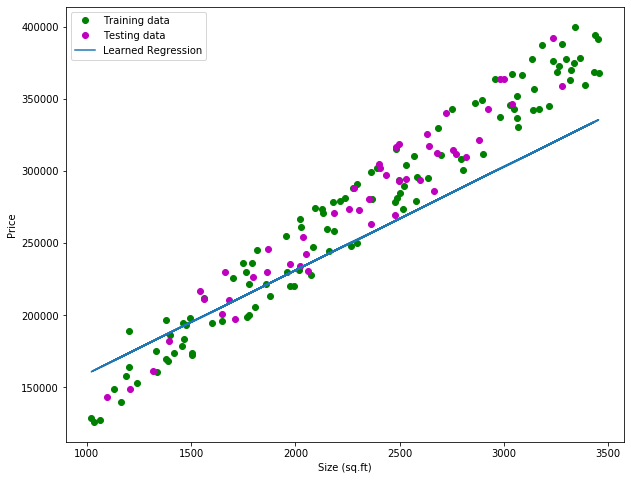

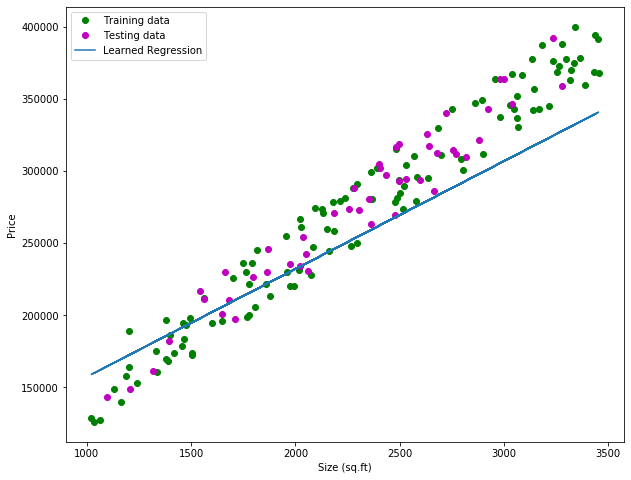

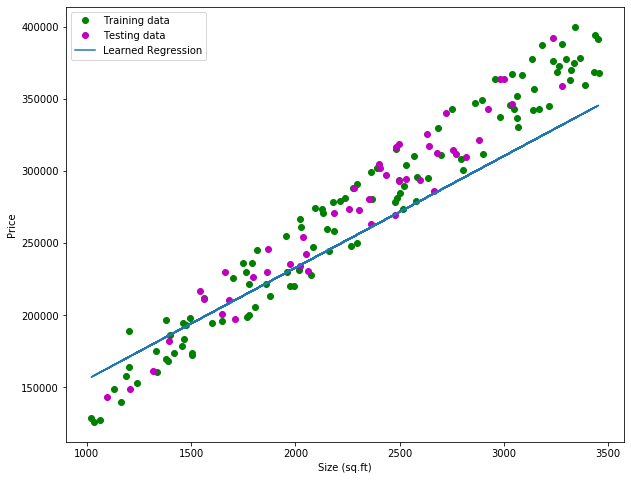

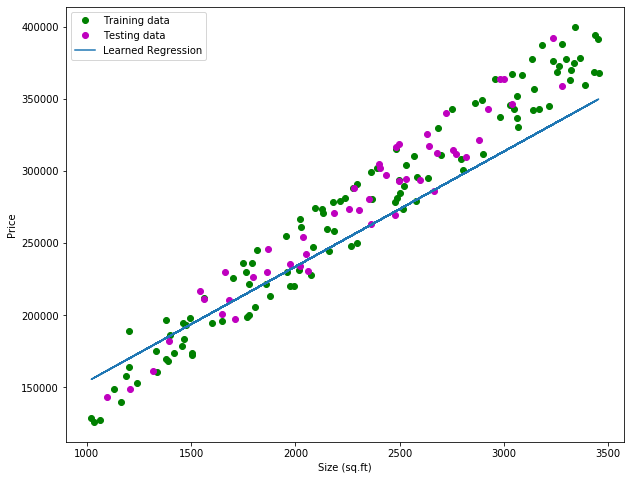

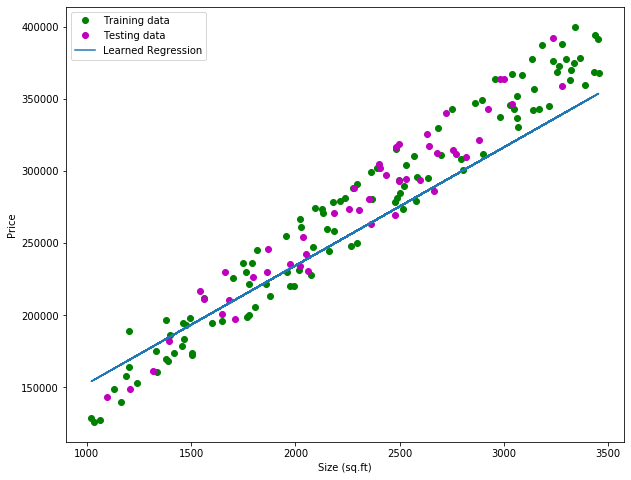

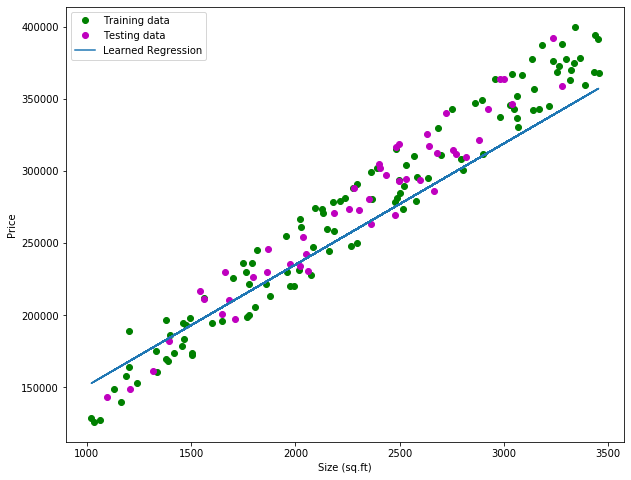

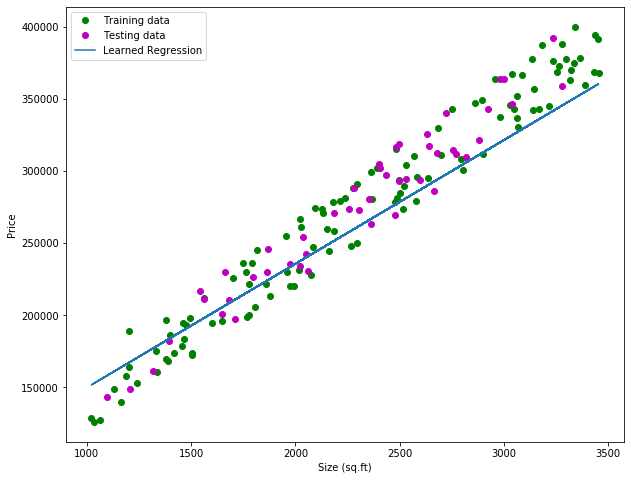

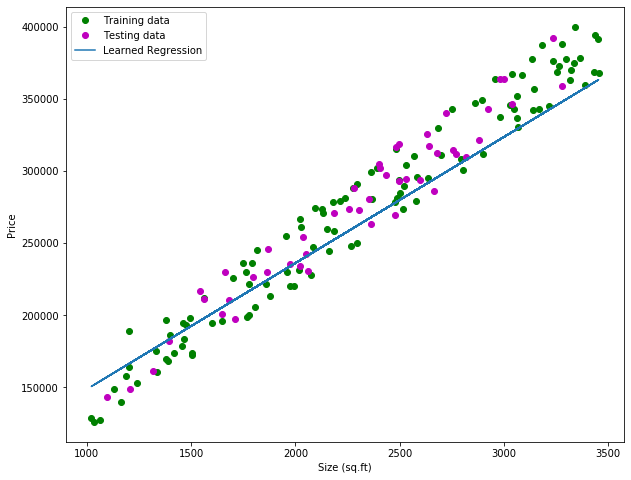

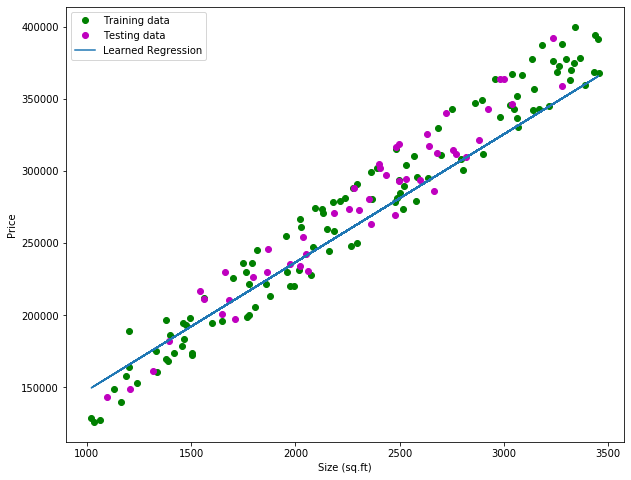

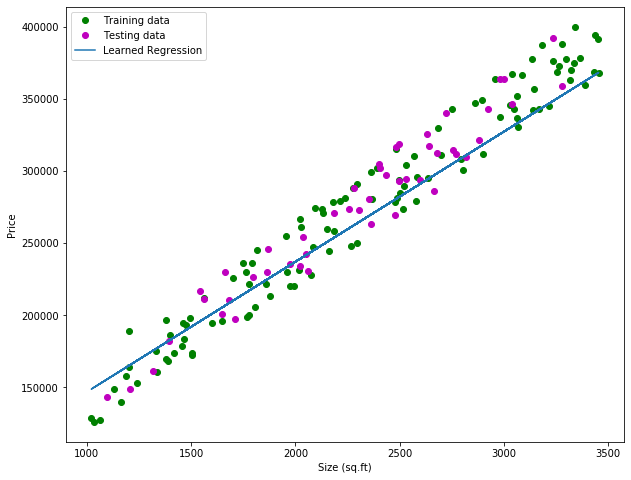

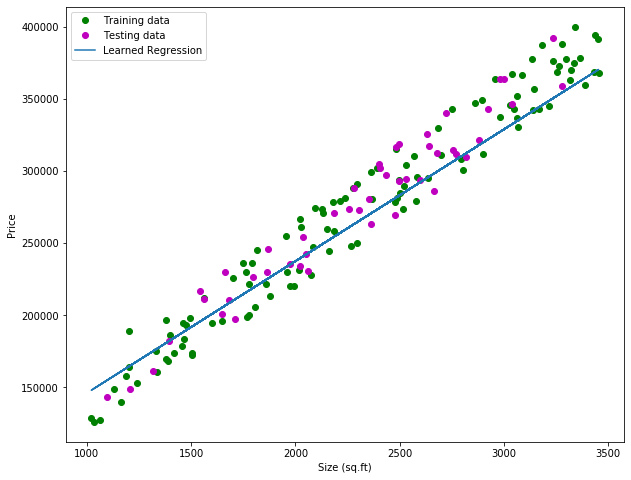

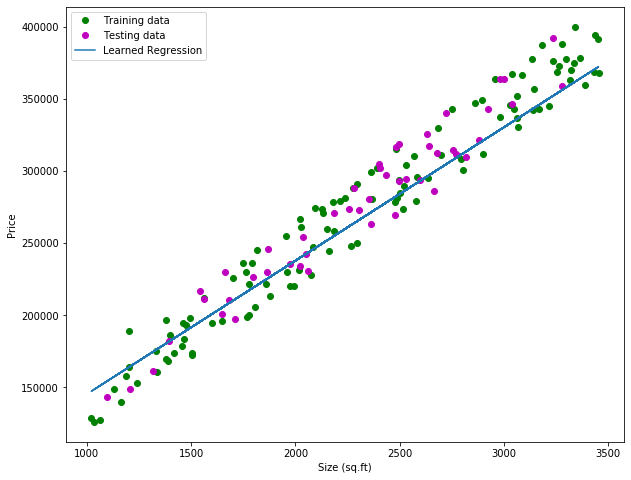

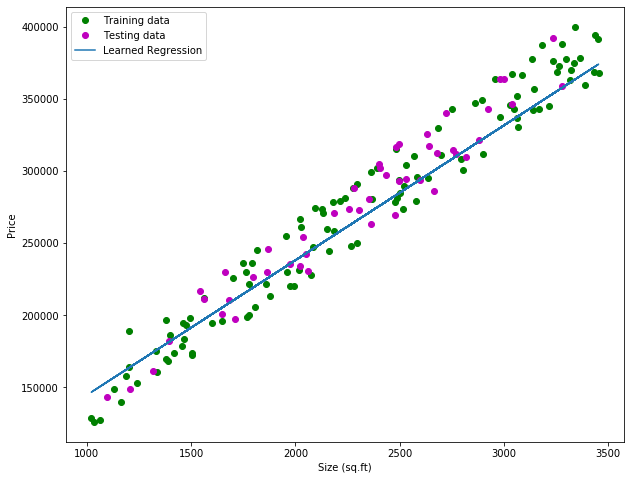

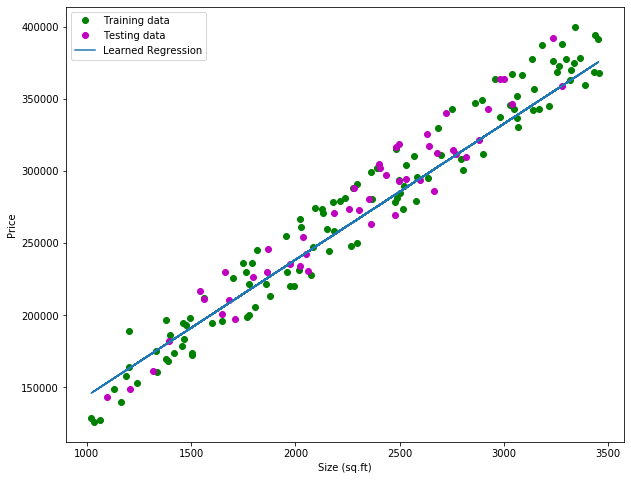

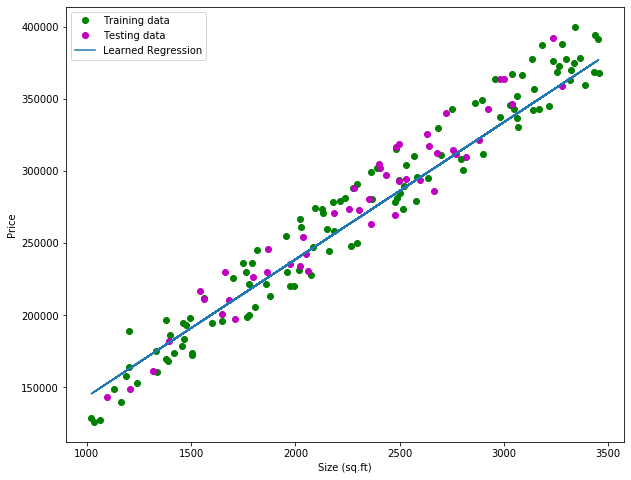

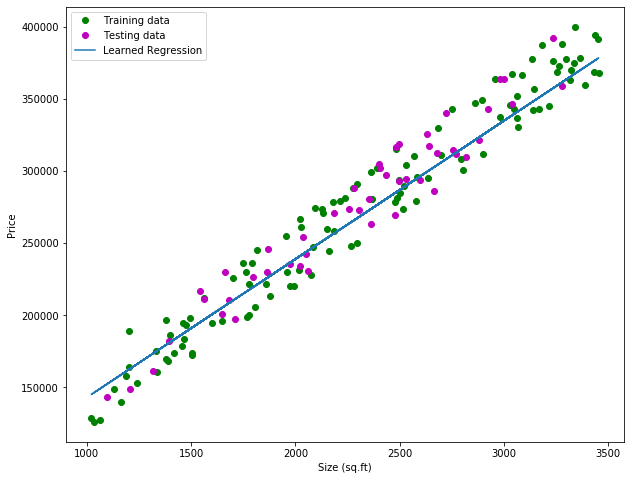

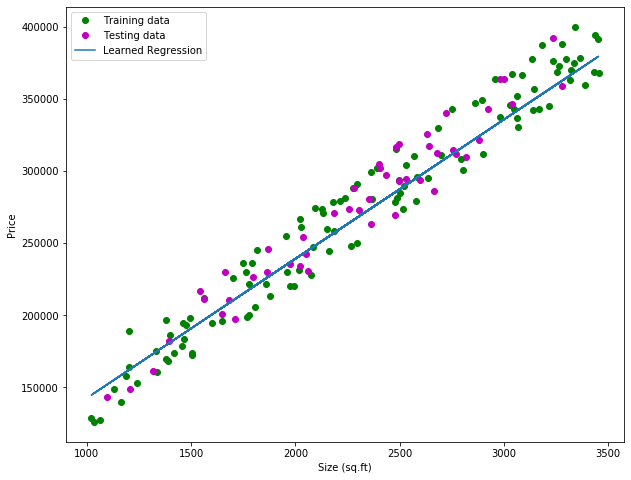

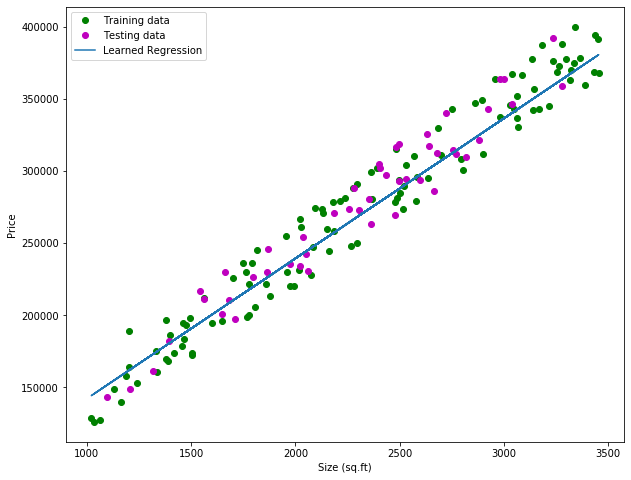

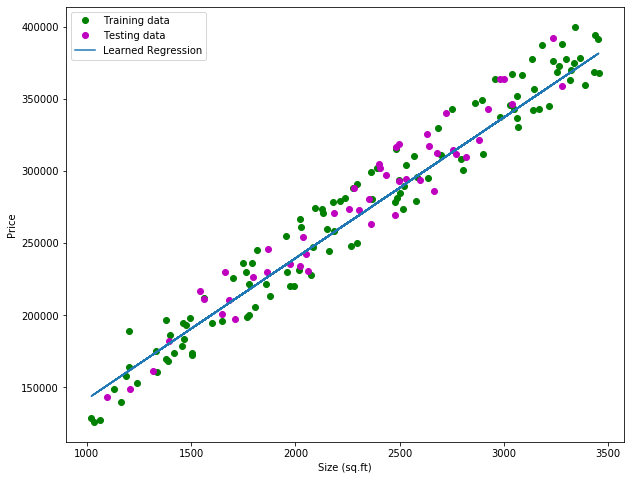

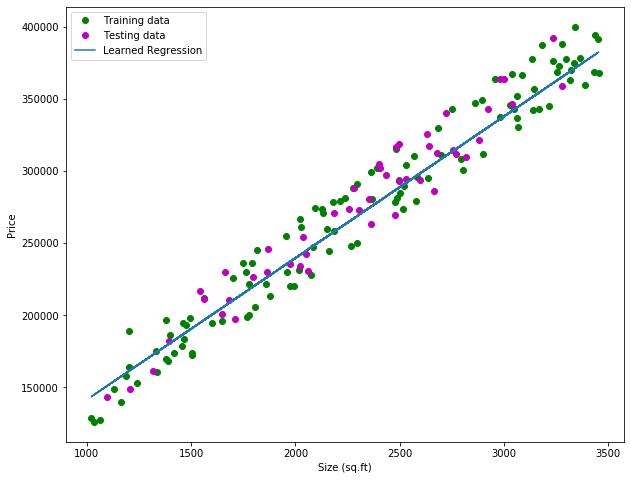

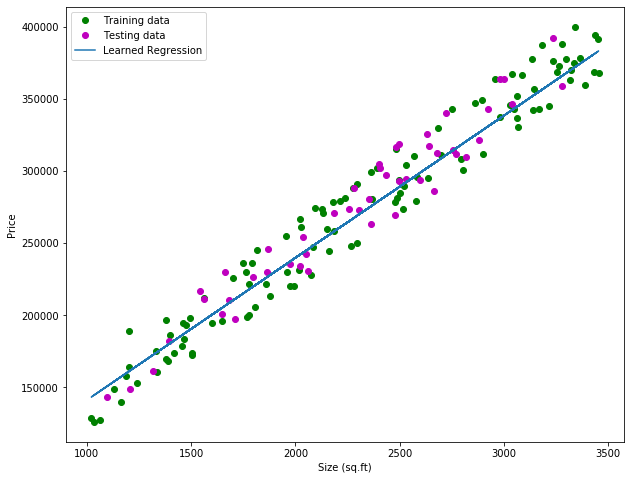

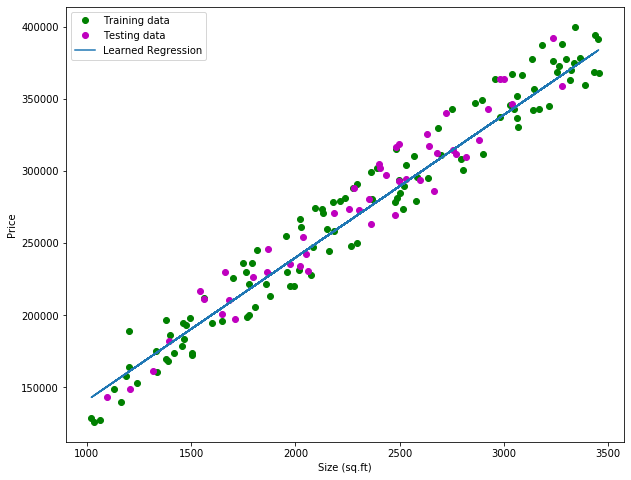

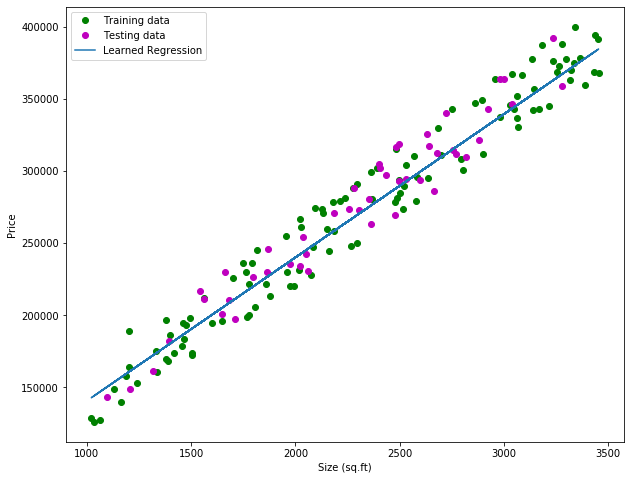

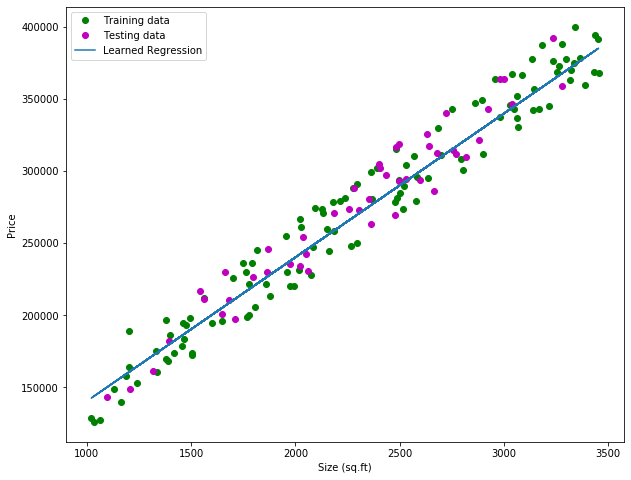

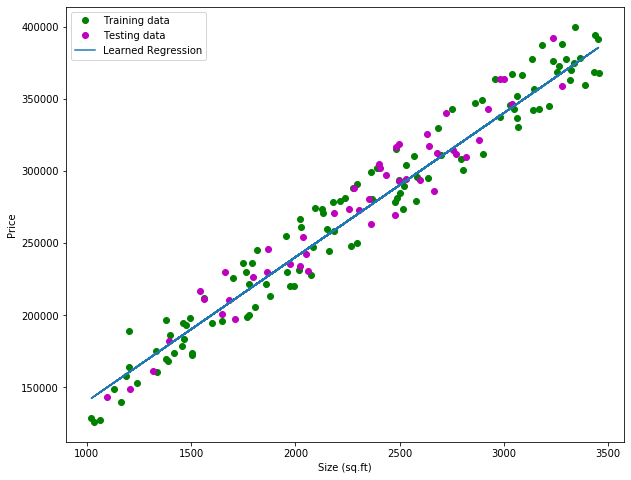

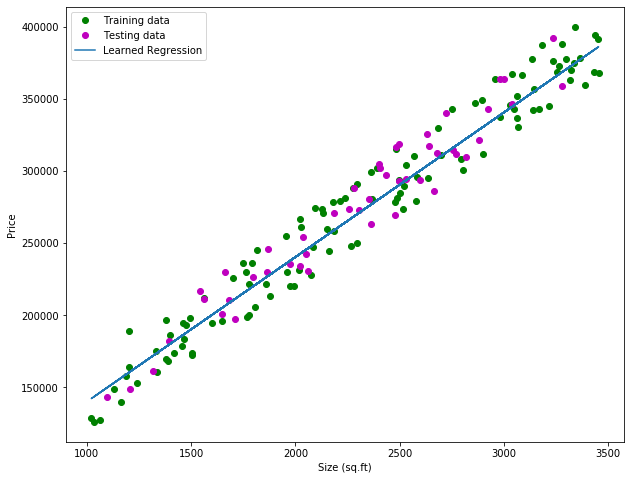

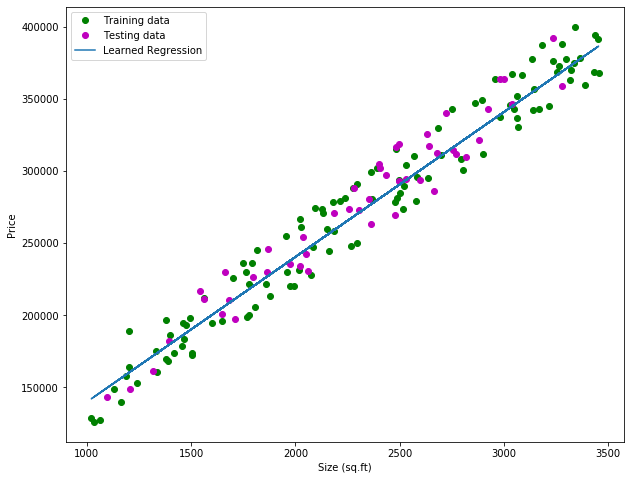

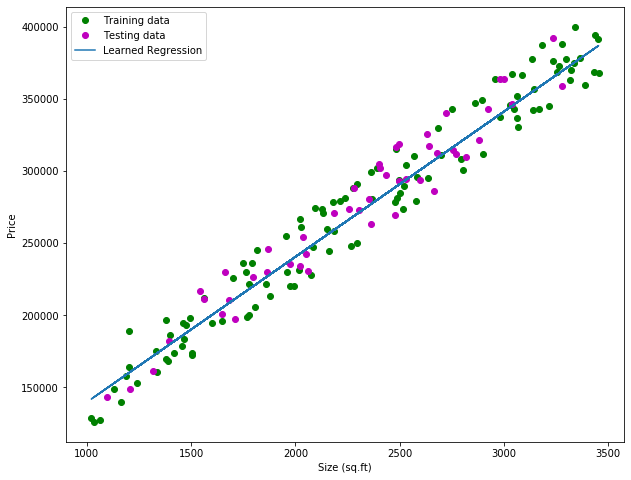

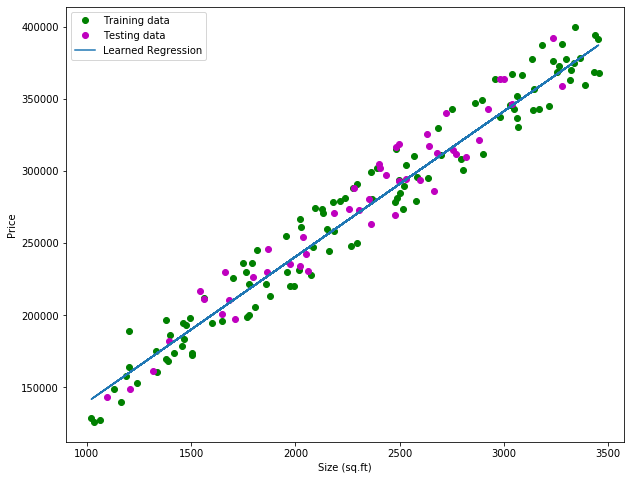

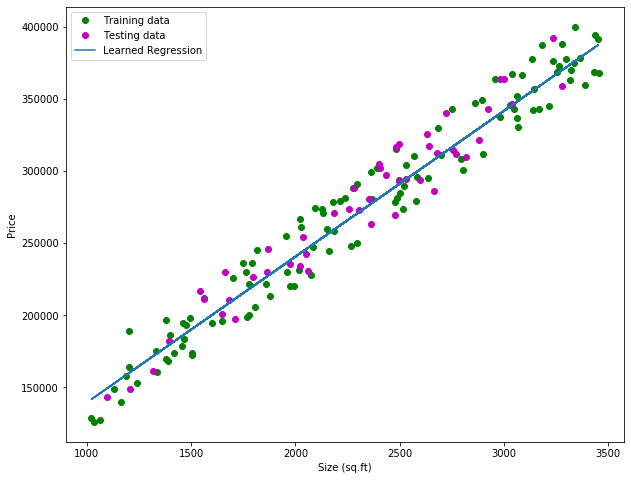

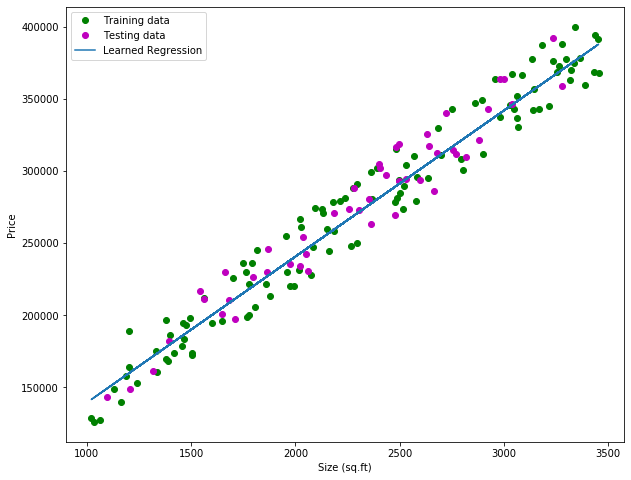

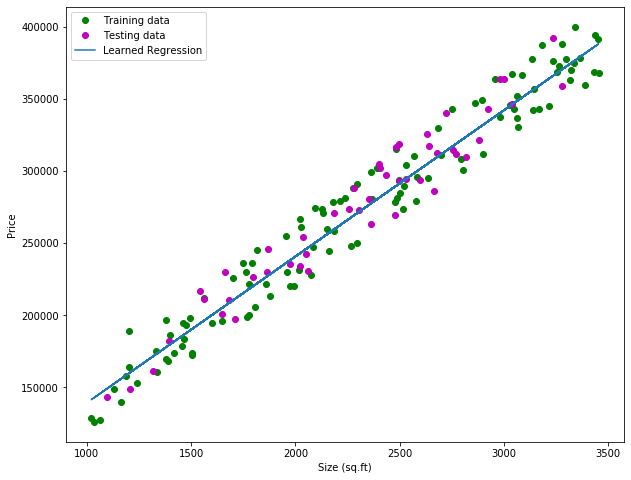

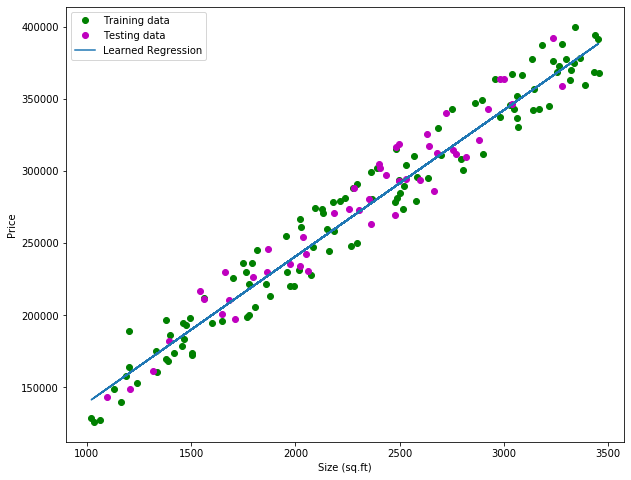

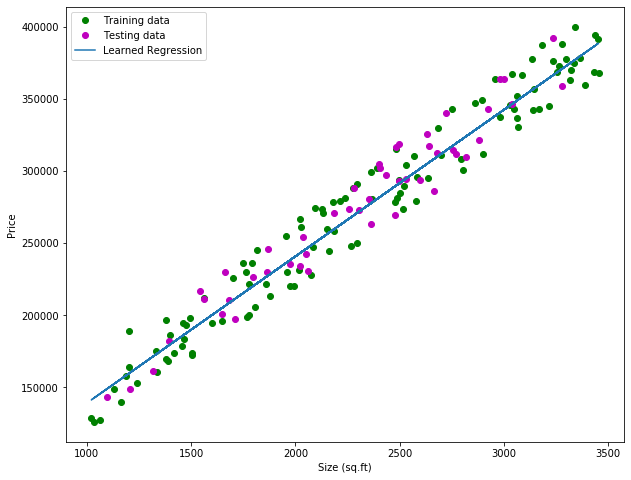

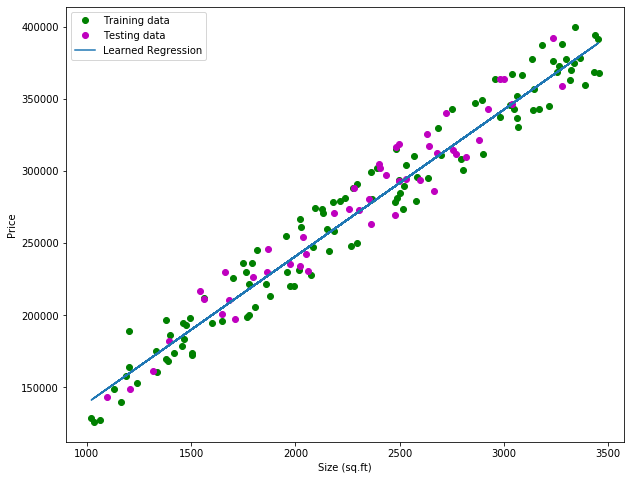

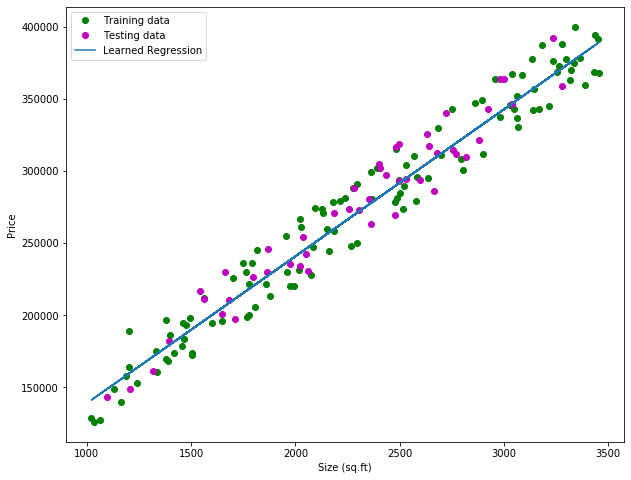

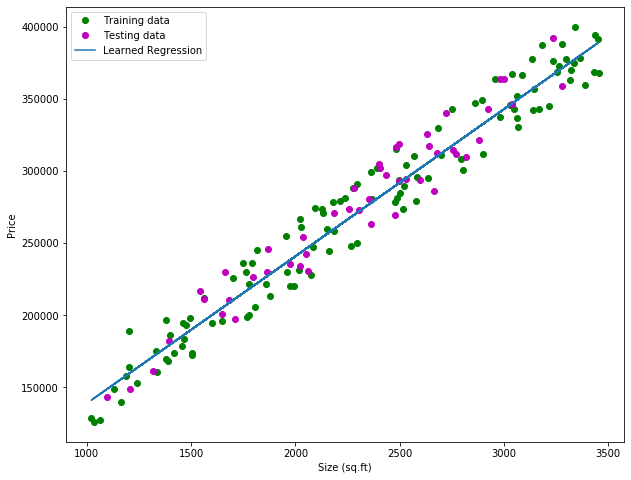

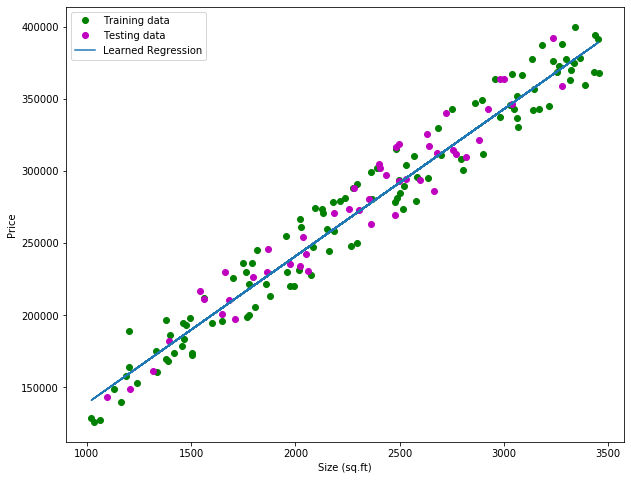

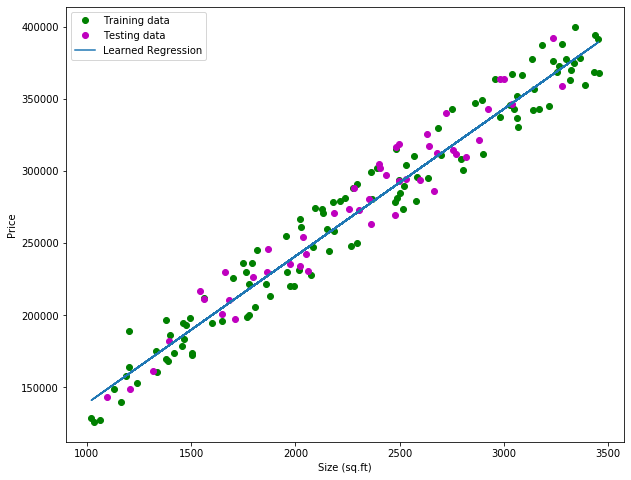

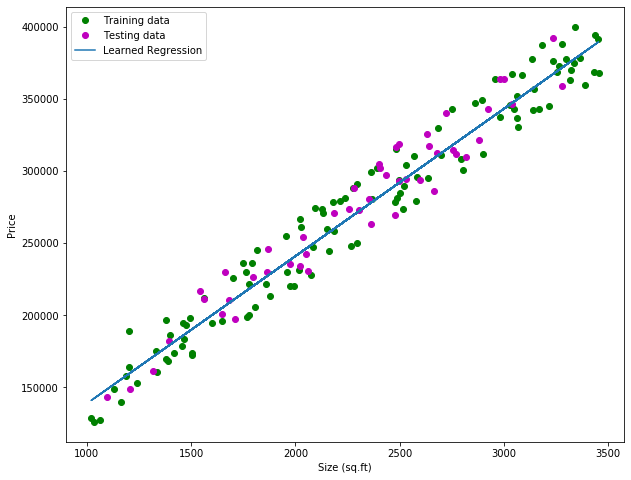

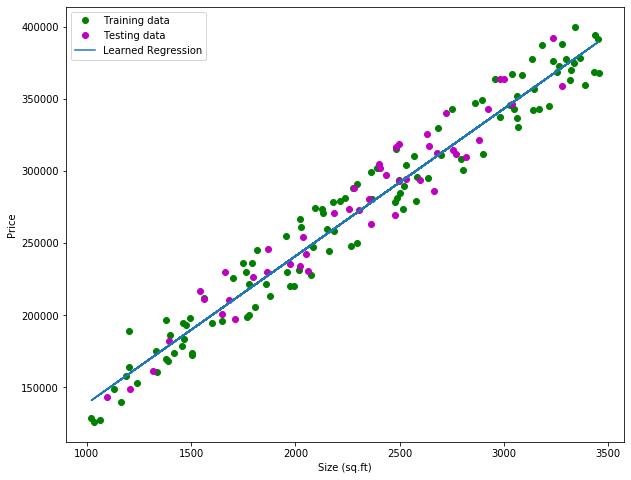

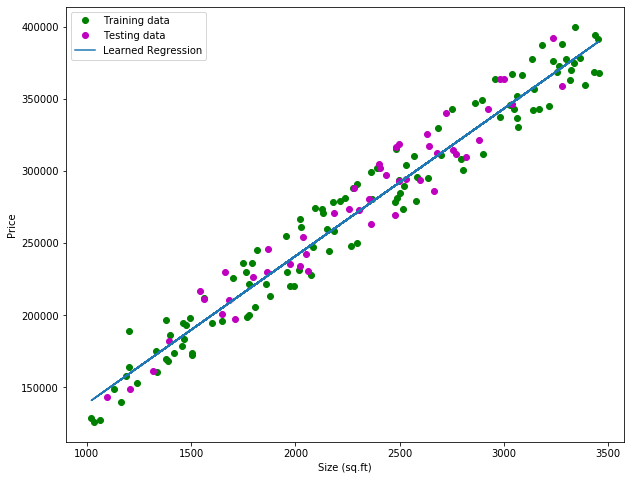

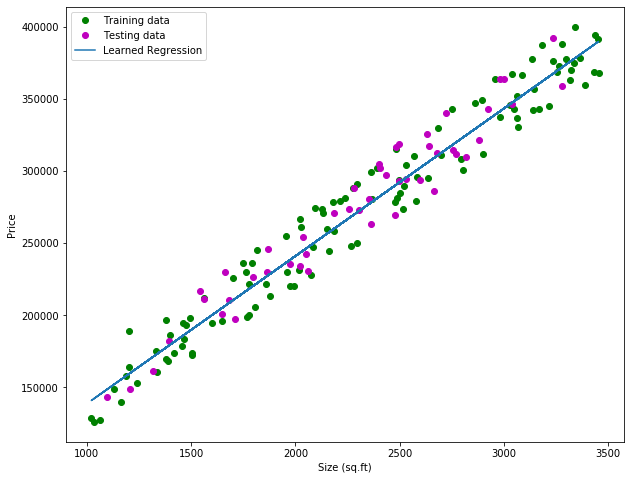

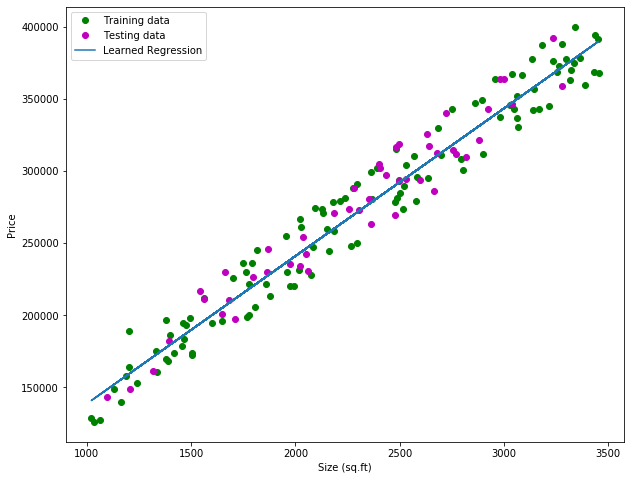

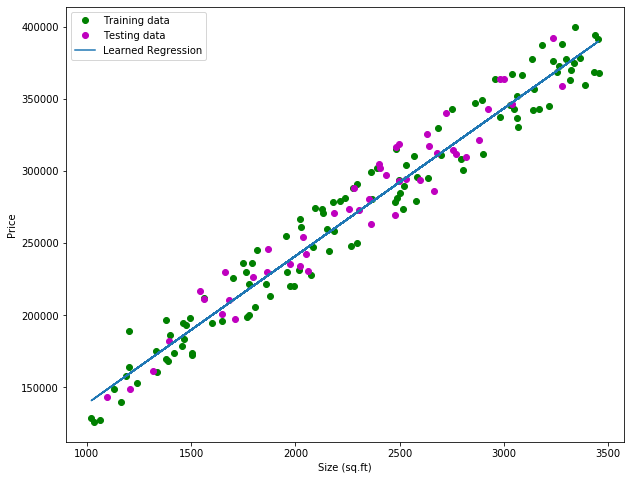

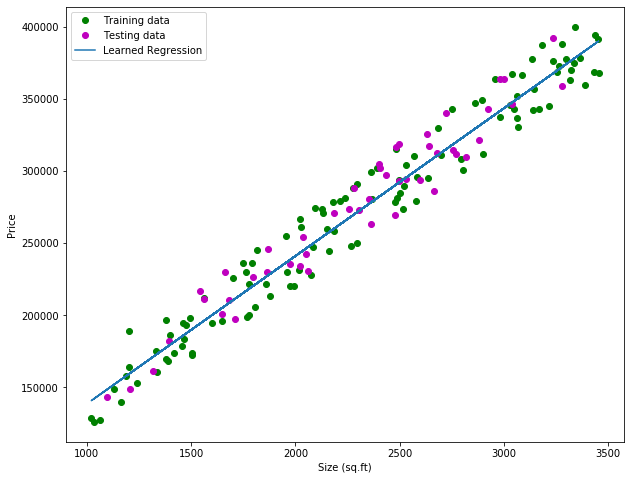

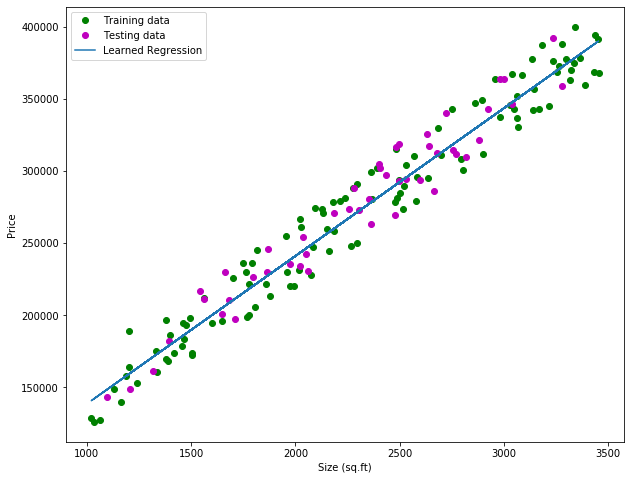

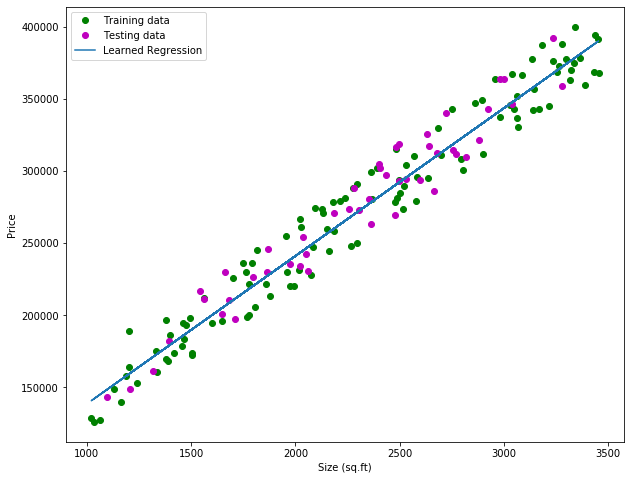

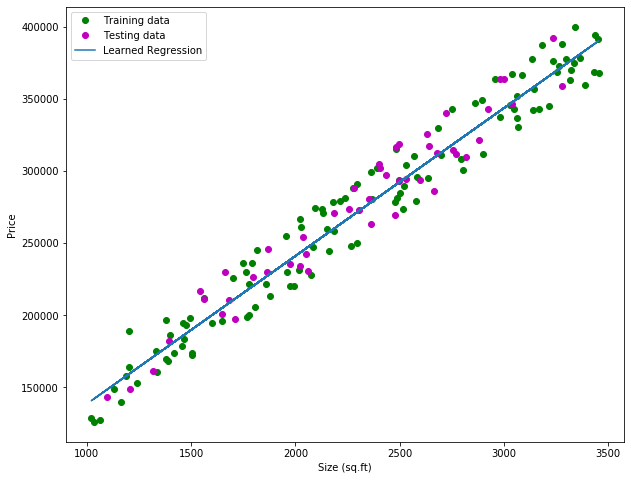

In [29]:
for iteration in range(50):
    for (x,y) in zip(train_house_size_norm, train_price_norm):
        sess.run(optimizer, feed_dict={tf_house_size:x,tf_price:y})
    
    c = sess.run(tf_cost,feed_dict={tf_house_size: train_house_size_norm,tf_price:train_price_norm})
    training_cost = sess.run(tf_cost,feed_dict={tf_house_size:train_house_size_norm,tf_price: train_price_norm})
    
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()

    train_price_mean = train_price.mean()
    train_price_std = train_price.std()

    # Plot the graph
    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
             (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
             label='Learned Regression')
 
    plt.legend(loc='upper left')
    plt.show()